In [15]:
%pylab inline
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


# Constants

In [87]:
Beta = 0.4
K = 1.38E-23 #J/K
mu_n = 0.59 
H_0 = 2.19E-18 # 1/s
Omega_m = 0.3089
Omega_b = 0.02230/0.7**2
m_p = m_p = 1.672621777E-27#kg
a = 9*Beta*K*Omega_m/(mu_n*m_p*300*(H_0**2)*Omega_b) # K/m^2 Eq. 18 in Analyical work
kpc = 3.08567758128E19 # m 
print a , "m^2/K"

2.37482422029e+38 m^2/K


# Functions: Temperature Eq. 21  (In the Analytic description)& concentration parameter Eq. 22

In [88]:
def tvir(M):
    T = 2554.0*M**(2/3.) / (31. * (1E6)**(2/3.))#K
    return T
def c(M, a, rvir):
    T = tvir(M)
    c = 1 / ((a*T/rvir**2)-1)
    return sqrt(c)

# Defining Mass and redshift range

In [80]:
#M = linspace(1E8, 1E16, 1000)
M_1 = linspace(20, 37, 1000)
M = exp(M_1)
z = ones(10)
#print min(M), max(M), exp(15)*10
len(z), len(M)
z = zeros([1000])
f = open("rvir_in.dat", 'w')
for i in range(len(M)):
    f.write(("%f \t %f\n") %(M[i], z[i]))
f.close()

# Running the rvir code

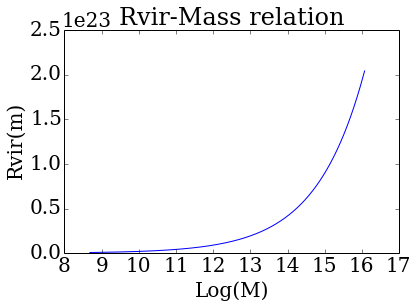

In [93]:
!./rvirmod/a.out 1000 > rvir_outiii.dat

data = loadtxt("rvir_outiii.dat")
h = 0.7
R = data[:,0]*kpc/h # the virial radius is in Kpc/h
plot(log10(M), R)
#plot(log10(M), log10(M)**(1/3.))
savefig("Mass_vs_rvir.png")
title("Rvir-Mass relation")
xlabel("Log(M)")
ylabel("Rvir(m)")

In [90]:
C = c(M, a, R)

#Ludlow et al.  concentration 

In [91]:
ludlow = loadtxt("ludlow.txt")
logm = ludlow[:,0]
logc = ludlow[:,1]

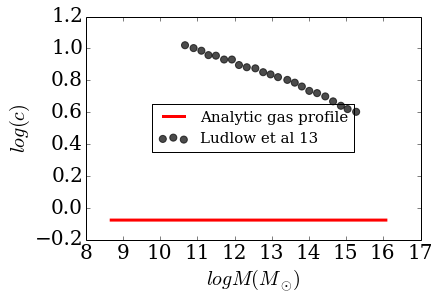

In [92]:
plot(log10(M), log10(C), lw=3, c='r', label="Analytic gas profile")
scatter(logm, logc, c="k", alpha=0.7, s=50, label="Ludlow et al 13")
xlabel(r"$logM(M_{\odot})$")
ylabel(r"$log(c)$")
legend(fontsize=15, loc="center")
savefig("c_vs_m.png", bbox_inches='tight')